In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine
from sklearn.model_selection import KFold
data = load_wine()

print("Feature Names:", ', '.join(data.feature_names))
print("Target Names:", ', '.join(data.target_names))

# TODO 1

Feature Names: alcohol, malic_acid, ash, alcalinity_of_ash, magnesium, total_phenols, flavanoids, nonflavanoid_phenols, proanthocyanins, color_intensity, hue, od280/od315_of_diluted_wines, proline
Target Names: class_0, class_1, class_2


In [3]:
# TODO 2

X = data.data
y = data.target

# Getting the dimensions of the data
number_of_samples, number_of_features = X.shape

# Getting the unique classes
unique_classes = np.unique(y)
number_of_classes = len(unique_classes)

# Printing the results
print("Unique classes:", unique_classes)
print(f"Number of samples: {number_of_samples}")
print(f"Number of features: {number_of_features}")
print(f"Number of classes: {number_of_classes}")

Unique classes: [0 1 2]
Number of samples: 178
Number of features: 13
Number of classes: 3


In [4]:
from sklearn.preprocessing import StandardScaler
# TODO 3

scaling = StandardScaler() 
scaling.fit(X)
Xs = scaling.transform(X)

In [5]:
from sklearn.decomposition import PCA

#TODO 4

# Define the number of principal components
n_components = 2

# Create and fit the PCA model in a single step
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True)
transformed_data = pca.fit_transform(Xs)

# Display the transformed data
print(transformed_data)


[[ 1.52465093 -0.91092088]
 [ 1.01565144  0.21038044]
 [ 1.15690036 -0.65072291]
 [ 1.72705576 -1.73943202]
 [ 0.46377716 -0.54891575]
 [ 1.4021471  -1.33934833]
 [ 1.12580264 -0.74141308]
 [ 0.94668623 -1.01535657]
 [ 1.15420395 -0.57934421]
 [ 1.26579354 -0.49819019]
 [ 1.59957263 -0.82183911]
 [ 0.80662848 -0.38618814]
 [ 0.97152078 -0.42641147]
 [ 1.58965275 -0.71348498]
 [ 1.9825095  -1.32268798]
 [ 1.05965371 -1.04917692]
 [ 0.99840895 -1.46864915]
 [ 0.87292305 -1.02946847]
 [ 1.62818711 -1.58920737]
 [ 0.95821751 -0.66965009]
 [ 1.43623187 -0.49658456]
 [ 0.49947678 -0.15257873]
 [ 1.16539709  0.05794751]
 [ 0.75617166  0.32578309]
 [ 0.80976486  0.20012699]
 [ 0.45512163 -0.59361915]
 [ 0.81606332 -0.43301866]
 [ 0.56790227  0.0566829 ]
 [ 1.00597118 -0.43516598]
 [ 1.03709287 -0.12083621]
 [ 1.14930637 -0.78302502]
 [ 1.23075791 -0.92882661]
 [ 0.74862865 -0.03325128]
 [ 0.87463291 -1.03055033]
 [ 0.64833034 -0.44043449]
 [ 0.87515482 -0.111513  ]
 [ 0.63659635 -0.41565026]
 

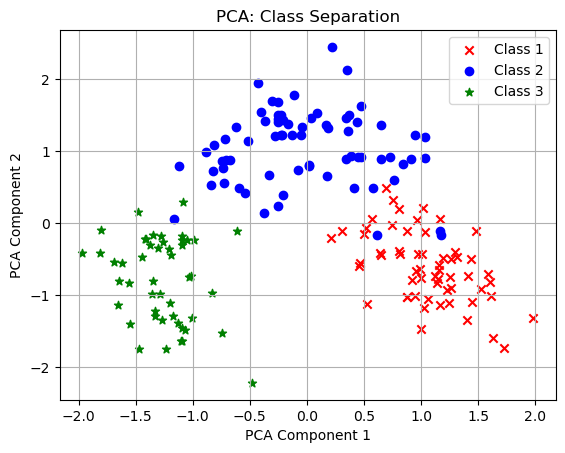

In [6]:
# TODO 5

import matplotlib.pyplot as plt

markers = ['x', 'o', '*']
colors = ['red', 'blue', 'green']
labels = ['Class 1', 'Class 2', 'Class 3']

# Consolidating the scatter plot commands into a loop
for i, (marker, color, label) in enumerate(zip(markers, colors, labels)):
    plt.scatter(transformed_data[y == i, 0], transformed_data[y == i, 1], marker=marker, color=color, label=label)

# Labeling and adding legend
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA: Class Separation')
plt.legend()
plt.grid()
plt.show()

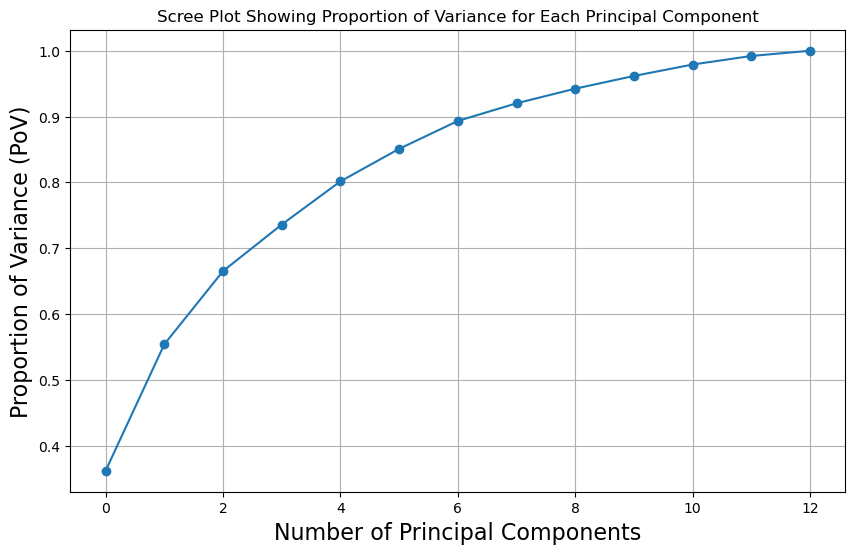

[0.36198848 0.55406338 0.66529969 0.73598999 0.80162293 0.85098116
 0.89336795 0.92017544 0.94239698 0.96169717 0.97906553 0.99204785
 1.        ]


In [7]:
#TODO 6
pca = PCA(n_components=number_of_features, svd_solver='randomized', whiten=True)

# Fit PCA on the scaled data
pca.fit(Xs)

# Use the explained variance ratio for Proportion of Variance
PoV = np.cumsum(pca.explained_variance_ratio_)

# Plotting
plt.figure(figsize=(10, 6))  
plt.plot(PoV, marker='o') 
plt.grid()
plt.xlabel('Number of Principal Components', fontsize=16)
plt.ylabel('Proportion of Variance (PoV)', fontsize=16)
plt.title('Scree Plot Showing Proportion of Variance for Each Principal Component')
plt.show()  # Display the plot


print(PoV)

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

nfold = 5
ncomp_test = np.arange(2, 12)
num_nc = len(ncomp_test)
acc = np.zeros((num_nc, nfold))

# Create a K-fold object with a fixed random state for reproducibility
kf = KFold(n_splits=nfold, shuffle=True, random_state=42)

# TODO 7

for icomp, ncomp in enumerate(ncomp_test):
    # Initialize PCA outside the inner loop
    pca = PCA(n_components=ncomp, svd_solver='randomized', whiten=True)

    for ifold, (Itr, Its) in enumerate(kf.split(X)):
        Xtr, ytr = X[Itr], y[Itr]
        Xts, yts = X[Its], y[Its]

        scaler = StandardScaler()
        scaler.fit(Xtr)
        Xtr_s = scaler.transform(Xtr)

        pca.fit(Xtr_s)
        Z = pca.transform(Xtr_s)

        logreg = LogisticRegression(multi_class='auto', solver='lbfgs', max_iter=1000)
        logreg.fit(Z, ytr)

        Xts_s = scaler.transform(Xts)
        Zts = pca.transform(Xts_s)
        yhat = logreg.predict(Zts)

        acc[icomp, ifold] = np.mean(yhat == yts)

    print(f"Completed {ncomp} components")

print(acc)

Completed 2 components
Completed 3 components
Completed 4 components
Completed 5 components
Completed 6 components
Completed 7 components
Completed 8 components
Completed 9 components
Completed 10 components
Completed 11 components
[[1.         0.94444444 0.94444444 0.97142857 0.94285714]
 [0.97222222 0.91666667 0.94444444 0.97142857 1.        ]
 [1.         0.88888889 1.         0.97142857 1.        ]
 [1.         0.94444444 1.         0.97142857 1.        ]
 [1.         0.94444444 1.         0.94285714 1.        ]
 [1.         0.97222222 1.         0.94285714 1.        ]
 [1.         0.97222222 1.         0.94285714 1.        ]
 [1.         0.97222222 1.         0.97142857 1.        ]
 [1.         0.97222222 1.         0.97142857 1.        ]
 [1.         0.97222222 1.         0.97142857 1.        ]]


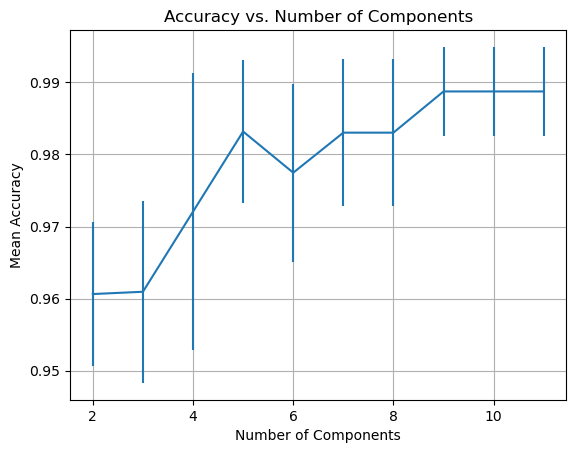

Mean Accuracies: [0.96063492 0.96095238 0.97206349 0.9831746  0.97746032 0.98301587
 0.98301587 0.98873016 0.98873016 0.98873016]
The selected number of components with normal rule is 9
The selected number of components with one SE rule is 5


In [9]:
# TODO 8
# Calculate mean and standard error of the accuracy
mean_accuracy = np.mean(acc, axis=1)
std_error = np.std(acc, axis=1) / np.sqrt(nfold)

# Plotting
plt.errorbar(ncomp_test, mean_accuracy, yerr=std_error, fmt='-')
plt.xlabel('Number of Components')
plt.ylabel('Mean Accuracy')
plt.title('Accuracy vs. Number of Components')
plt.grid()
plt.show()

# Print mean accuracies
print(f"Mean Accuracies: {mean_accuracy}")

# Optimal order with the normal rule
index_of_max_accuracy = np.argmax(mean_accuracy)
selected_ncomp_normal = ncomp_test[index_of_max_accuracy]
print(f"The selected number of components with normal rule is {selected_ncomp_normal}")

# Optimal order with one SE rule
accuracy_target = mean_accuracy[index_of_max_accuracy] - std_error[index_of_max_accuracy]
index_one_se_rule = np.where(mean_accuracy >= accuracy_target)[0][0]
selected_ncomp_one_se = ncomp_test[index_one_se_rule]
print(f"The selected number of components with one SE rule is {selected_ncomp_one_se}")

In [10]:
# TODO 9
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

scaler = StandardScaler()
pca = PCA()
svc = SVC()
pipe = Pipeline(steps=[('scaler', scaler), ('pca', pca), ('svc', svc)])

In [11]:
# TODO 10

# Define the ranges using logspace for c_test and gam_test
ncomp_test = np.arange(3, 10)
c_test = np.logspace(-2, 3, 6)
gam_test = np.logspace(-3, 1, 5)

In [12]:
# TODO 11

params = {'pca__n_components' : ncomp_test, 'svc__C' : c_test, 'svc__gamma' : gam_test}

In [13]:
# TODO 12

estimator = GridSearchCV(pipe, params, cv=5, return_train_score=True)
estimator.fit(X,y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()), ('svc', SVC())]),
             param_grid={'pca__n_components': array([3, 4, 5, 6, 7, 8, 9]),
                         'svc__C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'svc__gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])},
             return_train_score=True)

In [14]:
#TODO 13

print(estimator.best_estimator_)
print(estimator.best_params_)
print(estimator.best_score_)
print("Best Estimator: \n{}\n".format(estimator.best_estimator_))
print("Best Parameters: \n{}\n".format(estimator.best_params_))
print("Best Test Score: \n{}\n".format(estimator.best_score_))
#-------

# Extract and print the mean test score
mean_test_score = estimator.cv_results_['mean_test_score']
print(f"Mean Test Score Shape: {mean_test_score.shape}")

# Convert PCA component numbers to integers
pca_components = estimator.cv_results_['param_pca__n_components'].data.astype(int)

# Filter where PCA components are 5
components_filter = np.where(pca_components == 5)

# Extract and print the specific test scores, SVC C parameters, and SVC gamma parameters
specific_test_scores = estimator.cv_results_['mean_test_score'][components_filter]
svc_C_values = estimator.cv_results_['param_svc__C'][components_filter]
svc_gamma_values = estimator.cv_results_['param_svc__gamma'][components_filter]

print(f"SVC C Parameters (PCA Components = 5): {svc_C_values}")
print(f"SVC Gamma Parameters (PCA Components = 5): {svc_gamma_values}")
print(f"Specific Test Scores Shape: {specific_test_scores.shape}")
print("Specific Test Scores:", specific_test_scores)

# Reshape the specific test scores array
reshaped_test_scores = specific_test_scores.reshape(len(c_test), len(gam_test))
print("Reshaped Test Scores:", reshaped_test_scores)


Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=5)),
                ('svc', SVC(gamma=0.1))])
{'pca__n_components': 5, 'svc__C': 1.0, 'svc__gamma': 0.1}
0.9777777777777779
Best Estimator: 
Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=5)),
                ('svc', SVC(gamma=0.1))])

Best Parameters: 
{'pca__n_components': 5, 'svc__C': 1.0, 'svc__gamma': 0.1}

Best Test Score: 
0.9777777777777779

Mean Test Score Shape: (210,)
SVC C Parameters (PCA Components = 5): [0.01 0.01 0.01 0.01 0.01 0.1 0.1 0.1 0.1 0.1 1.0 1.0 1.0 1.0 1.0 10.0
 10.0 10.0 10.0 10.0 100.0 100.0 100.0 100.0 100.0 1000.0 1000.0 1000.0
 1000.0 1000.0]
SVC Gamma Parameters (PCA Components = 5): [0.001 0.01 0.1 1.0 10.0 0.001 0.01 0.1 1.0 10.0 0.001 0.01 0.1 1.0 10.0
 0.001 0.01 0.1 1.0 10.0 0.001 0.01 0.1 1.0 10.0 0.001 0.01 0.1 1.0 10.0]
Specific Test Scores Shape: (30,)
Specific Test Scores: [0.39904762 0.39904762 0.39904762 0.39904762 0.39904762 0.39904762
 0.77603175

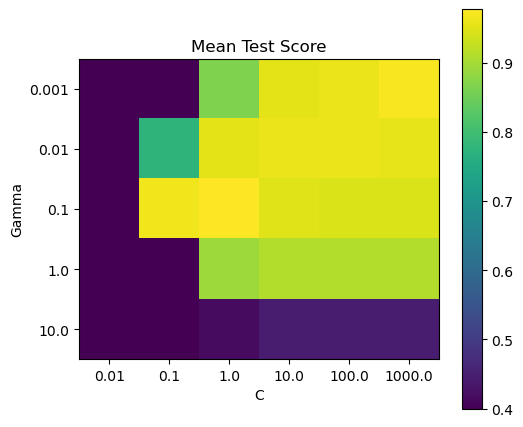

In [15]:
# TODO 14
# Set figure size and adjust subplot spacing
fig, ax = plt.subplots(figsize=(6, 5))
fig.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)

# Create heatmap for the scores
cax = ax.imshow(reshaped_test_scores.T, interpolation='nearest')

# Labeling and setting ticks
ax.set_xlabel('C')
ax.set_ylabel('Gamma')
ax.set_xticks(np.arange(len(c_test)))
ax.set_yticks(np.arange(len(gam_test)))
ax.set_xticklabels(c_test)
ax.set_yticklabels(gam_test)

# Add bar
fig.colorbar(cax)

# Set title, show plot
ax.set_title('Mean Test Score')
plt.show()